# Tree base model

## Decision Tree(CART : Classification and Regression Tree)
> **`Decision Tree`** 모델은 **예측/분류가 모두 가능**한 **지도학습** 머신러닝 모델이다.   
스무고개 게임을 하듯 여러 개의 가정을 데이터에 반영하고 이를 바탕으로 결정경계(decision boundary)를 생성  
모델 예측 및 분류 결과에 따른 해석이 굉장히 용이하여 **모델 해석이 필요한 문제에 사용**한다.ex)신용평가, 모델분류  
최근에는 `Decision Tree`모델을 베이스로 한 부스팅 트리 모델(**`Xgboost`**, **`LightGBM`**, **`Catboost`**)등으로 데이터분석 대회 수상을 하면서 실무 적용 케이스가 많아졌다.

### 모델구조
> 뿌리 노드(root node) : 최상위 노드, 모든 샘플 포함  
잎 노드(leaf node) : 최하위 노드, 여기에 속한 샘플이 어떤 클래스인지 결정 됨  
노드(node) : 뿌리 노드와 잎 노드 사이에 있는 노드  
가지(branch) : 노드를 나누는 기준  
깊이(depth) : 뿌리 노드와 잎 노드 까지의 노드 갯수

<img src="https://drive.google.com/uc?id=1gTRvBWaKpbR5VI9Iv1_OlwKg4YQGPxXr">

### 모델학습
#### 불순도
> `Decision Tree` 모델을 학습시키는 방법  
정보화 이론에서 사용하는 Gini 계수와 엔트로피를 사용한다.  
불순도가 0.5에 가까수록 불순도가 높고 0 혹은 1에 가까울 수록 순도가 높다.  
즉, 한 노드의 불순도가 가능한 많이 떨어지도록(순도가 올라가도록) 노드를 나눈다.

$$ Gini = 1 - \sum_1^n{(p_i)^2} $$

$$ Entropy = - \sum_1^n{p_iln(p_i)} $$

#### Gini index
위 예시에서 뿌리 노드 기준 지니계수 계산법  
class1 : 삼각형  
class2 : 동그라미  
>X < 0
>> True = class1 3개, class2 4개  
$1 - ({3 \over 3+4})^2 - ({4 \over 3+4})^2 = 0.48$  
False = class1 4개, class2 3개  
$1 - ({4 \over 4+3})^2 - ({3 \over 4+3})^2 = 0.48$  
total Gini 계수  
$1 - ({7 \over 7+7})0.48 - ({7 \over 7+7})0.48 = 0.52$

위 예시에서 잎 노드 기준 지니계수 계산법  
class1 : 삼각형  
class2 : 동그라미  
>Y < 1
>> True = class1 3개, class2 0개  
$1 - ({3 \over 3})^2 - ({0 \over 3})^2 = 0$  
False = class1 0개, class2 4개  
$1 - ({0 \over 4})^2 - ({4 \over 4})^2 = 0$  
total Gini 계수  
$1 - ({3 \over 3+4})0 - ({4 \over 3+4})0 = 1$

위의 예시에서 계산한 total Gini 계수가 곧 Decision tree 모델의 비용함수가 된다.  
이를 바탕으로 더 나은 선택을 하게 되는 결정경계를 생성하는 방법으로 데이터를 학습하는데 이를 greedy 알고리즘이라 한다.

### Decision Tree classifier 실습

In [3]:
# 필요모듈 import 


In [2]:
# iris 데이터로드


In [ ]:
# 로딩 데이터 확인


In [4]:
# 데이터 분할


In [5]:
# 모델 import


In [6]:
# 모델 생성


In [ ]:
# 모델 학습


In [ ]:
# 모델평가


In [ ]:
# test셋 분류 결과 확인


In [ ]:
# 모델 평가지표 출력


### 모델 해석을 위한 시각화 방법
#### feature importance
트리 기반 모델은 트리를 분기하는 과정에서 어떤 변수가 모델을 학습하는데 중요한지 살펴볼 수 있다.

<BarContainer object of 4 artists>

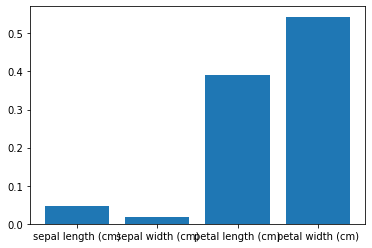

In [11]:
# feature importance 시각화


#### model plotting

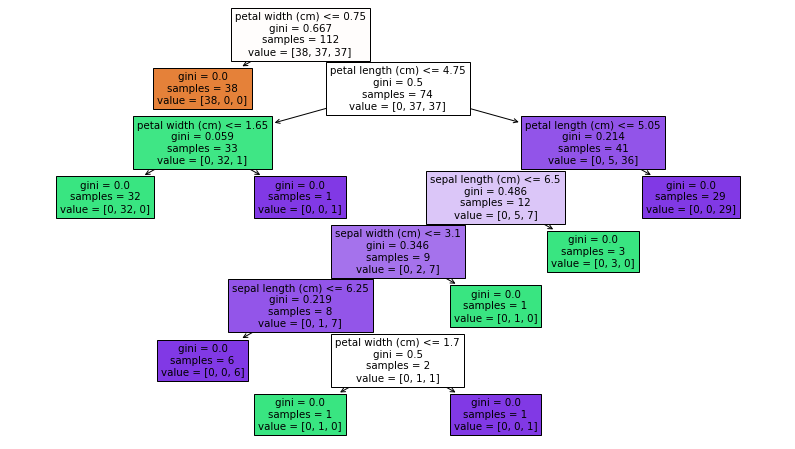

In [12]:
# 모델 시각화


### 가지치기 (pruning)
>`Decision Tree`모델은 모든 **잎 노드의 불순도가 0이 되는 순간까지 모델을 성장**시키면서 크기를 키워나간다.  
순수 노드로만 이루어진 트리 모델은 훈련 데이터를 100% 정확도로 맞출 수 있다.  
이러한 특성 때문에 트리 모델은 **과적합에 취약**하다.  
과적합 방지를 위해서는 **트리의 복잡도를 제어** 할 필요가 있다.

>과적합 방지를 위한 모델링 파라메터  
>> - **`max_depth`** : 트리의 최대 깊이  
- `max_leaf_nodes` : 잎 노드의 최대개수  
- `min_sample_leaf` : 잎 노드가 되기 위한 최소 샘플 갯수  
- `min_sample_split` : 잎 노드가 분지 되기 위한 최소 샘플 갯수

위의 iris 데이터는 3개의 클래스로 이루어진 데이터셋이지만 모델플로팅 결과 2뎁스의 노드에서 어느정도 데이터 구분이 되었습니다.  
이를 기준으로 사후 가지치기를 진행 해 보겠습니다.

## Decision tree regressor
> `Decision Tree`모델은 알고리즘 특성으로 분류 및 예측 모델링에 모두 사용이 가능하다.  
일반적으로 잎 노드에 속한 학습샘플의 값의 평균을 바탕으로 예측값을 결정한다.  
회귀모델 평가 방법인 MSE를 각 노드에 속한 샘플에 적용하고 이를 최소화 시킨다.  

<img src="https://drive.google.com/uc?id=1VNT8MulVBhqDLj0tVTRrf8s-8EIv5RZP">
<img src="https://drive.google.com/uc?id=1ICIKUdPHbx9ZkBSKzOgl7248QaIQrq2U">

### Decision tree regressor 실습

In [7]:
# 보스턴 집값 데이터 로딩


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,y
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [8]:
# 타겟 데이터 분할


In [ ]:
# 테스트 데이터 분할


In [17]:
# 모델 import


In [18]:
# 모델 생성


In [ ]:
# 모델 학습


In [20]:
# 모델 예측


In [ ]:
# 모델 평가지표 출력


In [ ]:
# feature importance


## Random Forest
>**`Random forest`** 는 **`Decision Tree`** 모델의 **모형 결합(ensemble)방법론**  

### ensemble(앙상블)
> **복수의 예측 모형을 결합**하여 더 나은 성능의 예측을 하려는 시도이다.  
단일 모형을 사용할 때 보다 **성능 분산이 감소**하고, 즉 **과적합을 방지**한다.  
개별 모형이 성능이 안좋을 경우에는 결합 모형의 성능이 더 향상된다.  
앙상블 방법론에는 **배깅**, **부스팅**이 있다.

<img src="https://drive.google.com/uc?id=1JJVUyYwHD2ddpigy0D3mG5KFLc5Yq1qR">

#### bagging(배깅)
> 개별 모델을 병렬로 구성하여 모델을 결합하는 방법론이다.  
기존 학습데이터에서 **복원 추출**로 여러개의 sub sample 데이터셋을 만든 후 각 데이터셋을 병렬 구성 모델에 학습시켜 서로 다른 결과를 얻는다.  
개별 모델의 결과값을 voting(투표법) 혹은 평균법을 사용하여 개별 모델 결과를 바탕으로 최종 추정치를 얻는다.  

<img src="https://drive.google.com/uc?id=1CMsFhLTApJqrOlGdqVE4qWH89j04w_xF">

#### Random Forest Bootstrap Aggregating
> **`Random forest`** 는 대표적인 배깅 방법론으로 weak model로 **`Decision Tree`** 를 사용한다.  
배깅 사용 시 추가적으로 부트스트랩 방법론을 추가하여 모델 학습에 사용한다.  
부트스트랩은 복원 추출 된 sub sample 데이터셋 생성 시 랜덤 샘플 및 feature를 선택하여 모델 학습에 사용한다.

<img src="https://drive.google.com/uc?id=1MfkxFwIsQJgjT_VD_CFl_fM3WJfc_3BG">

### Ramdom Forest 실습

In [23]:
# 모델 import


### 과적합 방지를 위한 모델링 파라메터  
> - **n_estimators** : 사용 할 트리 모델 갯수  
- **max_depth** : 트리의 최대 깊이

In [24]:
# 모델 생성


In [ ]:
# 모델 학습


In [ ]:
# 모델 예측


In [ ]:
# 평가


## Boosting Tree
> 배깅과 부스팅의 차이점은 학습을 위해 사용하는 개별모델을 병렬/직렬로 구성함에 있다.  
배깅의 경우 sub sample에 따라 개별 모델을 모두 학습시키고 결과를 투표 혹은 평균을 내어 예측한다면  
부스팅은 **개별 모델의 학습을 순차적**으로 시키며 이전 개별 모델의 결과 중 **오분류 된 데이터 혹은 오차에 가중치 부여**  
초기에는 동일 가중치를 갖지만 각 학습 과정을 거치며 복원 추출 시 가중치의 분포/이전 round의 오차를 고려  

>> 해당모델에는 `Adaboost`, `GBM`, `Xgboost`, `lightGBM`, `catboost`가 있다.

### bagging 과 boosting
<img src="https://drive.google.com/uc?id=1rhB9YkRkKILRb0GqOfa99K-EQ7CEcrPc">

### Adaptive booting(Adaboost)
> a -> f 순서로 학습이 진행 되고 있다. 각 학습 단계(round)에서 오분류 된 데이터에 가중치를 부여하고  
다음 라운드에서 가중치가 부여 된 데이터를 잘 맞추기 위한 개별모델이 학습 된다.  
최종 모델은 개별 모델의 결과가 합쳐져서 최종 모델링이 된다.

<img src="https://drive.google.com/uc?id=1VKmbttZT4aPOAaYuqhw2os7nFMOs6MMJ">

### gradient boost
이전 round 모델의 데이터별 오류를 학습하는 모델을 사용하여 점진적으로 총 모델링 오차를 줄이는 부스팅 방법

$$y = h_0(x) + error_0 $$
$$error_0 = h_1(x) + error_1 $$
$$error_1 = h_2(x) + error_2 $$
$$\vdots$$
$$y = h_0(x) + h_1(x) + h_2(x) + \cdots + small error $$

<img src="https://drive.google.com/uc?id=1Ty-CEINGgXuHtghd0GuDsxO1CfWahDYB">

## xgboost
> 머신러닝 알고리즘 대회인 kaggle, KDD cup등에서 우승을 한 팀들이 xgboost를 많이 활용한 것이 알려지면서 주목받음.  
boosting 모델에서 오류를 학습하여 다음 round에 반영시키는 것은 gadient boosting과 큰 차이가 없음.  
다만, 학습을 위한 비용함수에 규제화 식이 추가되어 모델이 과적합 되는 것을 방지함.  
규제화를 통해 복잡한 모델에 패널티를 부여  

$$obj^{(t)} = \sum_1^{n} l(y_i, \hat{y}_i^{(t)}) + \sum_{i=1}^t \Omega(f_i) $$


In [ ]:
# 모델 설치


In [28]:
# 모델 import


In [29]:
# 보스턴 데이터 로드


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,y
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [30]:
# 타겟 데이터 분할

# 테스트셋 분할


In [ ]:
# 모델 생성

'''
xbgoost 주요 파라메터

모델 파라메터
verbosity : round 출력결과 0=무음, 1=경고, 2=정보, 3=디버그
n_jobs : 병렬쓰레드 구성, 로컬컴퓨터 코어 x 4 최대값
gpu_id : GPU 연산 처리 디바이스 설정
random_state : 랜덤시드
missing : 결측치 처리 np.nan을 디폴트로 사용

트리 파라메터
max_depth : 트리모델 최대 깊이
max_leaves : 트리모델 최대 잎 노드 갯수, 0=무제한 지정
grow_policy : 트리확장 방법 0=노드와 가장 가까운 노드 분할, 1=손실함수가 최소가 되는 지점에서 분할
gamma : 트리모델의 잎 노드 분할을 만드는 데 필요한 최소 손실 감소.
min_child_weight : 관측치에 대한 최소 가중치 값
subsample : 부트스트랩 샘플 비율
colsample_bytree : 부트스트랩 컬럼 비율
reg_alpha : L1, lasso, 0
reg_lambda : L2, ridge, 1

부스팅 파라메터
n_estimators : 부스팅 트리 갯수, round 횟수와 같은 수
learning_rate : round별 학습률
booster: 부스팅 트리 모델 선택
    gbtree
    gblinear
objective : 목적함수 
    reg : squarederror
    binary : logistic
    multi : softmax
    multi : softprob
eval_metric : 모델평가함수, 목적함수에 따라 지정되어 있음
    rmse: root mean square error
    error: Binary classification error rate (0.5 threshold)
    merror: Multiclass classification error rate
early_stopping_rounds : 학습 손실값 변동 없을 시 학습 종료 라운드 횟수 설정
callbacks : 학습 중 설정 값 전달 API
'''

In [ ]:
# 모델 학습


In [33]:
# 모델 예측


In [ ]:
# 평가지표 출력


<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

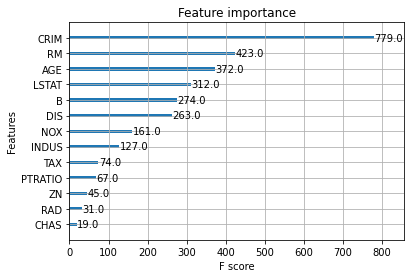

In [35]:
# 변수 중요도 출력


## 파라메터 서칭
tree base 모델은 설정 가능한 파라메터의 조합에 따라 모델 예측력 차이가 큰 특징을 가지고 있습니다.  
특히, Xgboost 모델의 경우 파라메터 설정에 따른 모델 예측력 차이가 굉장히 크기에 꼭 파라메터 서칭을 진행해주셔야 합니다.  
간단한 문법을 통해 파라메터 서칭을 진행 해보겠습니다.

In [1]:
from itertools import product

In [ ]:
# product 함수로 파라메터의 모든 조합 만들기


In [ ]:
# 위 파라메터 조합을 반복문으로 순환하며 파라메터 서칭


In [ ]:
# 최적 r2값, 최적 파라메터 확인


In [ ]:
# 최적 모델로 모델 다시 학습 및 평가


### sklearn GridSearchCV
sklearn 패키지에는 위의 파라메터 서칭 과정을 간편하게 진행 할 수 있도록 GridSearchCV 방법론을 제공합니다.  
기존 파라메터 서칭과 함께 cross validation 과정을 추가하여 데이터 분할에 강건한 모델을 선택할 수 있도록 제작 되었습니다.

In [16]:
# 그리드 서치 import


In [ ]:
# 그리드 서치 실습

'''
estimator : 모델 딕셔너리
param_grid : 파라메터 딕셔너리
scoring=None : 평가방법
n_jobs=None : 학습에 사용할 컴퓨터 코어 갯수
verbose=0 : 리포트 형식 0, 1, 2

scoring 참고
https://scikit-learn.org/stable/modules/model_evaluation.html
'''

In [ ]:
# grid 학습


In [ ]:
# 최적 모델 및 파라메터 확인
